In [239]:
from kiteconnect import KiteConnect
import requests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import backtrader as bt

### Connection to Kite

In [241]:
#Initializing all the variables we need
api_key = "XYZ"
api_secret = ""
client_id = ""

In [242]:
r = requests.get('https://kite.zerodha.com/connect/login?api_key='+api_key, allow_redirects=True)
print(r.url)
#Click the generated link below and retrieve the request_token

https://kite.zerodha.com/connect/login?api_key=XYZ


In [243]:
#Update this everytime to login
request_token = ""

In [121]:
access_token = kite.generate_session(api_secret = api_secret, request_token = request_token)["access_token"]
kite = KiteConnect(api_key=api_key)
kite.set_access_token(access_token)

### Instrument data

In [127]:
all_instruments = pd.DataFrame(kite.instruments(exchange = 'NSE'))

In [226]:
tradingsymbol = 'ZYDUSWELL'

In [228]:
instrument_token = all_instruments[all_instruments['tradingsymbol']== tradingsymbol].instrument_token.values[0]

#Dates between which we need historical data
from_date = "2015-09-01"
to_date = "2020-09-01"
interval = "day"

In [229]:
df = pd.DataFrame(kite.historical_data(instrument_token, from_date, to_date, interval)).set_index('date')

<IPython.core.display.Javascript object>


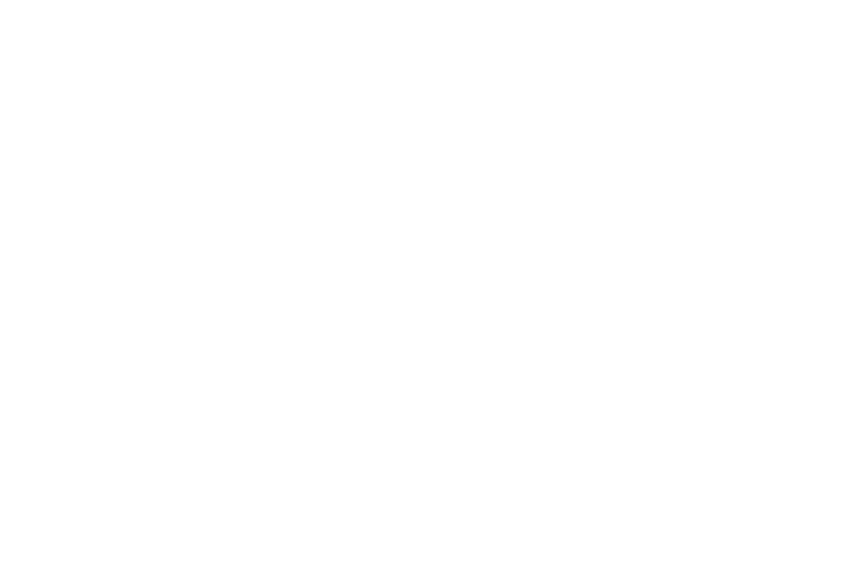

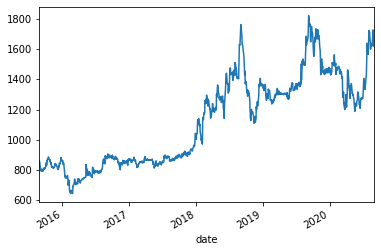

In [238]:
df['close'].plot()

In [ ]:
#Place an order based on the transaction type(BUY/SELL)
def place_order(transaction_type):
    kite.place_order(variety = 'regular', tradingsymbol = instrument_token, exchange = "NSE", quantity = 1, transaction_type=transaction_type,
                    order_type="MARKET",product="CNC")

In [ ]:
#Place your order
place_order('BUY')

### Check current orders and positions

In [ ]:
kite.orders()

In [ ]:
kite.positions()

### Close session

In [235]:
kite.invalidate_access_token()

True